# <b> Higgs Boson Machine Learning Challenge by Kaggle

download.avif

Image Source: https://newatlas.com/physics/cern-higgs-boson-dark-matter-source/

Higgs Boson Challenge

The Higgs boson machine learning challenge (HiggsML or Challenge in short) has been set up to promote collaboration between high energy physicists and data scientists. The ATLAS experiment at CERN provided simulated data used by physicists to optimize the analysis of the Higgs boson. The Challenge is organized by a small group of ATLAS physicists and data scientists. It is hosted by Kaggle at https://www.kaggle.com/c/higgs-boson. More information about the individual features is available at the technical documentation: https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf. This document provides technical background for the Challenge; reading and understanding it is not necessary to participate in the Challenge, but it is probably useful. No prior knowledge of high energy physics is
required. All information on how to participate in the Challenge is available on the Kaggle web site. 


#### **About the Dataset**
The dataset from Kaggle has 800000 events. Training set contain about 250000 events and the test set contain 550000 events.


#### **Features**

* All variables are floating point, except PRI_jet_num which is integer
* variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
* Variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by the physicists of ATLAS
* It can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables
* The weight column is generated by the simulation program that generated this dataset and thus can not be used as a predictor.

#### **Project Outline**
The following steps are taken in this work:

* Downloading the data
* Preprocessing, gathering insights and data cleaning 
* Exploratory Data Analysis
* Training & evaluating the different machine learning models, tuning hyperparameters to improve models. 
* Report of final performance of best model 
* At last, summary of the work 

# <b> Importing Libraries

In [2]:
# Import libraries
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

import warnings


#### <b> Downloading the Training dataset

In [3]:
!wget https://71e9c060-1478-4f85-91bf-9f17c1cbb363.usrfiles.com/ugd/71e9c0_0d3a85c481ad4e7397627de92743d11d.csv  -O training.csv -nv
!wget https://71e9c060-1478-4f85-91bf-9f17c1cbb363.usrfiles.com/ugd/71e9c0_16a75379465a4a168be7cf71e2e8145a.csv  -O test.csv -nv
!wget https://71e9c060-1478-4f85-91bf-9f17c1cbb363.usrfiles.com/ugd/71e9c0_df53ebd965f949399511db6d73387af7.csv  -O random_submission.csv -nv

2023-01-26 15:50:58 URL:https://71e9c060-1478-4f85-91bf-9f17c1cbb363.usrfiles.com/ugd/71e9c0_0d3a85c481ad4e7397627de92743d11d.csv [55253673/55253673] -> "training.csv" [1]
2023-01-26 15:50:59 URL:https://71e9c060-1478-4f85-91bf-9f17c1cbb363.usrfiles.com/ugd/71e9c0_16a75379465a4a168be7cf71e2e8145a.csv [112278440/112278440] -> "test.csv" [1]
2023-01-26 15:50:59 URL:https://71e9c060-1478-4f85-91bf-9f17c1cbb363.usrfiles.com/ugd/71e9c0_df53ebd965f949399511db6d73387af7.csv [9238920/9238920] -> "random_submission.csv" [1]


In [4]:
df_train = pd.read_csv('training.csv')
print(f"Training dataset \nRows :{df_train.shape[0]} ; Columns :{df_train.shape[1]}")
df_train.head()

Training dataset 
Rows :250000 ; Columns :33


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [5]:
df_train.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


#### <b> Downloading the Test dataset

In [6]:
df_test = pd.read_csv('test.csv')
print(f"Testing dataset \nRows :{df_test.shape[0]} ; Columns :{df_test.shape[1]}")
df_test.head()

Testing dataset 
Rows :550000 ; Columns :31


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [7]:
df_test.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,...,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000
mean,624999.500000,-48.950144,49.261093,81.123904,57.824801,-707.448878,-599.705905,-708.391425,2.374076,18.988277,...,-0.008214,209.933695,0.980171,-348.946684,-399.883839,-399.896234,-691.309277,-708.150605,-708.153058,73.248856
std,158771.468365,406.233686,35.425422,40.435560,63.291314,454.928791,659.129589,453.461222,0.779895,21.767376,...,1.812777,126.910079,0.979271,533.155176,489.467786,489.457747,480.435230,453.834190,453.830095,98.467134
min,350000.000000,-999.000000,0.000000,6.810000,0.000000,-999.000000,-999.000000,-999.000000,0.237000,0.000000,...,-3.142000,13.847000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000
25%,487499.750000,78.167750,19.313000,59.422000,14.192000,-999.000000,-999.000000,-999.000000,1.815000,2.838000,...,-1.574000,122.984750,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,624999.500000,105.076000,46.455500,73.747000,38.469500,-999.000000,-999.000000,-999.000000,2.492000,12.390000,...,-0.017000,179.949000,1.000000,38.970000,-1.862000,-2.111000,-999.000000,-999.000000,-999.000000,40.503500
75%,762499.250000,130.769000,73.646000,92.173000,79.234250,0.503000,84.266250,-4.538000,2.962000,27.649000,...,1.558000,263.917250,2.000000,75.499000,0.431000,0.484000,33.832000,-2.429000,-2.260000,110.507000
max,899999.000000,1949.261000,968.669000,1264.965000,1337.187000,8.724000,4794.827000,17.294000,5.751000,759.363000,...,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000


### Downloading random submisions

In [8]:
df_random_submission = pd.read_csv('random_submission.csv')
df_random_submission.head()

,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,b
3,350003,510885,s
4,350004,455944,s


# <b>Data Preprocessing:

Dropping the EVENT-ID column as it not going to help in modeling in any way. 

In [9]:
df_train = df_train.drop("EventId", axis =1)
df_test = df_test.drop("EventId",axis =1)

Displaying train dataset characteristics.

In [10]:
print('Class distribution of the training set is:')
ipd.display(df_train['Label'].value_counts())
print('The label s = signal of Higgs Boson and b = background\n')
ipd.display(df_train.describe())

Class distribution of the training set is:


b    164333
s     85667
Name: Label, dtype: int64

The label s = signal of Higgs Boson and b = background



,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


The class distribution of the training set is

* b (background) : 164333 events (66%)
* s (Higgs to tau tau): 85667 (34%)

 Doing the ordinal encoding on Label of Train and Random submission dataset

In [11]:
ord_En = OrdinalEncoder()

ord_Label = ord_En.fit_transform(df_train[['Label']])
ord_class = ord_En.fit_transform(df_random_submission[['Class']])

df_train['Label'] = ord_Label
df_random_submission['Class']= ord_class

In [12]:
df_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1.0
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0.0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0.0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,0.0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0.0


In [13]:
df_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


<b> Getting rid of all -999 values from both of the dataset and replacing them with NaN:

In [14]:
# Getting rid of all -999 values and replce with 'Nan'
df_train = df_train.replace(-999, np.nan)
df_test = df_test.replace(-999.000, np.nan)

# Printing information about percentage of missing values in the training dataset
perc_nans = df_train.isna().sum() * 100 / len(df_train)
perc_rows_nans = (len(df_train) - len(df_train.dropna()))*100/(len(df_train))
print("Percentage of rows containing at least one missing value:", perc_rows_nans)
print('\nTable of column name and percentage missing values')
print(perc_nans)

Percentage of rows containing at least one missing value: 72.7544

Table of column name and percentage missing values
DER_mass_MMC                   15.2456
DER_mass_transverse_met_lep     0.0000
DER_mass_vis                    0.0000
DER_pt_h                        0.0000
DER_deltaeta_jet_jet           70.9828
DER_mass_jet_jet               70.9828
DER_prodeta_jet_jet            70.9828
DER_deltar_tau_lep              0.0000
DER_pt_tot                      0.0000
DER_sum_pt                      0.0000
DER_pt_ratio_lep_tau            0.0000
DER_met_phi_centrality          0.0000
DER_lep_eta_centrality         70.9828
PRI_tau_pt                      0.0000
PRI_tau_eta                     0.0000
PRI_tau_phi                     0.0000
PRI_lep_pt                      0.0000
PRI_lep_eta                     0.0000
PRI_lep_phi                     0.0000
PRI_met                         0.0000
PRI_met_phi                     0.0000
PRI_met_sumet                   0.0000
PRI_jet_num             

Replacing all nan values with fill forward method 

In [15]:
df_train = df_train.fillna(method= 'ffill')
df_test = df_test.fillna(method= 'bfill')

print("Now, we dont have any 'nan' values in any of the dataset")

Now, we dont have any 'nan' values in any of the dataset


### Scaling the whole dataset except for the Weight , LAbel columns:

In [16]:
from sklearn.preprocessing import MinMaxScaler
column = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

df_train[column] = MinMaxScaler().fit_transform(np.array(df_train[column]))
df_test[column] = MinMaxScaler().fit_transform(np.array(df_test[column]))

<b> NOW, we don't have any negative or nan values in our dataset

In [17]:
df_train = round(df_train,2)
df_test = round(df_test,2)

In [18]:
df_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.05,0.08,0.01,0.00,0.15,0.11,0.51,0.12,0.00,0.00,...,0.82,0.04,0,0.02,0.44,0.36,0.2,0.54,0.91,0.00
1,0.05,0.07,0.06,0.04,0.15,0.11,0.51,0.33,0.00,0.04,...,0.32,0.07,1,0.02,0.44,0.36,0.2,0.54,0.91,0.03
2,0.06,0.06,0.07,0.00,0.15,0.11,0.51,0.46,0.01,0.03,...,0.20,0.04,0,0.20,0.39,0.45,0.2,0.54,0.91,0.00
3,0.07,0.03,0.07,0.01,0.15,0.11,0.51,0.47,0.01,0.02,...,0.69,0.07,0,0.20,0.39,0.45,0.2,0.54,0.91,0.00
4,0.03,0.09,0.04,0.07,0.15,0.11,0.51,0.14,0.10,0.33,...,0.46,0.39,3,0.20,0.39,0.45,0.2,0.54,0.91,0.32


In [19]:
df_train.describe()


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.095331,0.071315,0.055744,0.020232,0.282501,0.071971,0.496236,0.395370,0.006363,0.062179,...,0.979176,0.049900,0.499645,0.497887,0.039835,0.498920,0.500296,0.044682,1.646026,0.342668
std,0.048489,0.051360,0.030540,0.022766,0.204768,0.079975,0.103219,0.142998,0.008501,0.064118,...,0.977426,0.055516,0.198067,0.288763,0.046420,0.225511,0.288745,0.060066,1.875466,0.474603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070000,0.030000,0.040000,0.000000,0.100000,0.020000,0.440000,0.290000,0.000000,0.020000,...,0.000000,0.010000,0.350000,0.250000,0.010000,0.320000,0.250000,0.000000,0.020000,0.000000
50%,0.090000,0.070000,0.050000,0.010000,0.250000,0.040000,0.510000,0.420000,0.000000,0.040000,...,1.000000,0.030000,0.500000,0.490000,0.030000,0.500000,0.500000,0.020000,1.160000,0.000000
75%,0.110000,0.110000,0.060000,0.030000,0.430000,0.090000,0.550000,0.500000,0.010000,0.090000,...,2.000000,0.070000,0.650000,0.750000,0.050000,0.680000,0.750000,0.070000,2.400000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.820000,1.000000


# <b> Exploratory Data Analysis

<b> Creating a new train and test dataset, so it will not interfere with our Original Dataset:

Note: the weight column is generated by the simulation program that generated this dataset and thus can not be used as a predictor. Also droping the Weight Column, as we don't have the weight column in TEST DATASET.

In [20]:
df_train_new = df_train.drop("Weight",axis =1)

* <b> Cheking the correlations by plotting the heat map of correlations.

In [21]:
df_train_new.corr()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
DER_mass_MMC,1.000000,0.161286,0.735989,0.020768,-0.009864,-0.010330,0.006759,0.412486,0.010080,0.108273,...,0.076075,0.012734,0.004566,0.000740,0.002496,-0.010957,0.002403,0.002148,0.009294,0.010336
DER_mass_transverse_met_lep,0.161286,1.000000,0.189073,-0.247914,-0.039448,-0.041589,0.035907,0.043322,0.015671,-0.146397,...,-0.167574,-0.210258,-0.092228,-0.001478,0.003425,-0.012530,0.002505,0.002144,-0.209813,-0.350673
DER_mass_vis,0.735989,0.189073,1.000000,-0.061562,-0.010823,-0.016494,0.008594,0.576695,-0.001525,0.088428,...,0.052876,-0.026786,-0.047412,0.000577,0.003094,-0.019308,0.001502,0.001415,-0.052561,-0.014514
DER_pt_h,0.020768,-0.247914,-0.061562,1.000000,-0.012533,0.065881,-0.008972,-0.534931,0.308891,0.825567,...,0.777412,0.620465,0.517815,0.002139,0.001991,0.122844,-0.001798,-0.006316,0.802455,0.191236
DER_deltaeta_jet_jet,-0.009864,-0.039448,-0.010823,-0.012533,1.000000,0.797839,-0.835802,0.008674,-0.053754,-0.033368,...,-0.044484,-0.023093,-0.024440,-0.000036,-0.000630,-0.089063,-0.005709,0.004719,-0.034205,0.097880
DER_mass_jet_jet,-0.010330,-0.041589,-0.016494,0.065881,0.797839,1.000000,-0.763936,-0.036975,-0.013894,0.076596,...,0.053110,-0.006939,0.149349,0.001102,0.001300,0.237924,-0.005771,0.000589,0.078427,0.096916
DER_prodeta_jet_jet,0.006759,0.035907,0.008594,-0.008972,-0.835802,-0.763936,1.000000,0.003796,0.040071,0.004172,...,0.014790,0.015746,-0.012336,-0.002256,0.001482,0.002361,0.000985,-0.000633,0.005426,-0.087094
DER_deltar_tau_lep,0.412486,0.043322,0.576695,-0.534931,0.008674,-0.036975,0.003796,1.000000,-0.138315,-0.431927,...,-0.406564,-0.347804,-0.292308,-0.000794,0.003616,-0.071981,0.002976,0.005837,-0.448398,0.012205
DER_pt_tot,0.010080,0.015671,-0.001525,0.308891,-0.053754,-0.013894,0.040071,-0.138315,1.000000,0.354731,...,0.423318,0.334722,0.141274,-0.003420,0.005175,0.117039,-0.001223,-0.002251,0.375645,-0.017388
DER_sum_pt,0.108273,-0.146397,0.088428,0.825567,-0.033368,0.076596,0.004172,-0.431927,0.354731,1.000000,...,0.902528,0.757722,0.553551,0.000491,0.002570,0.236484,-0.001062,-0.005772,0.963982,0.153060


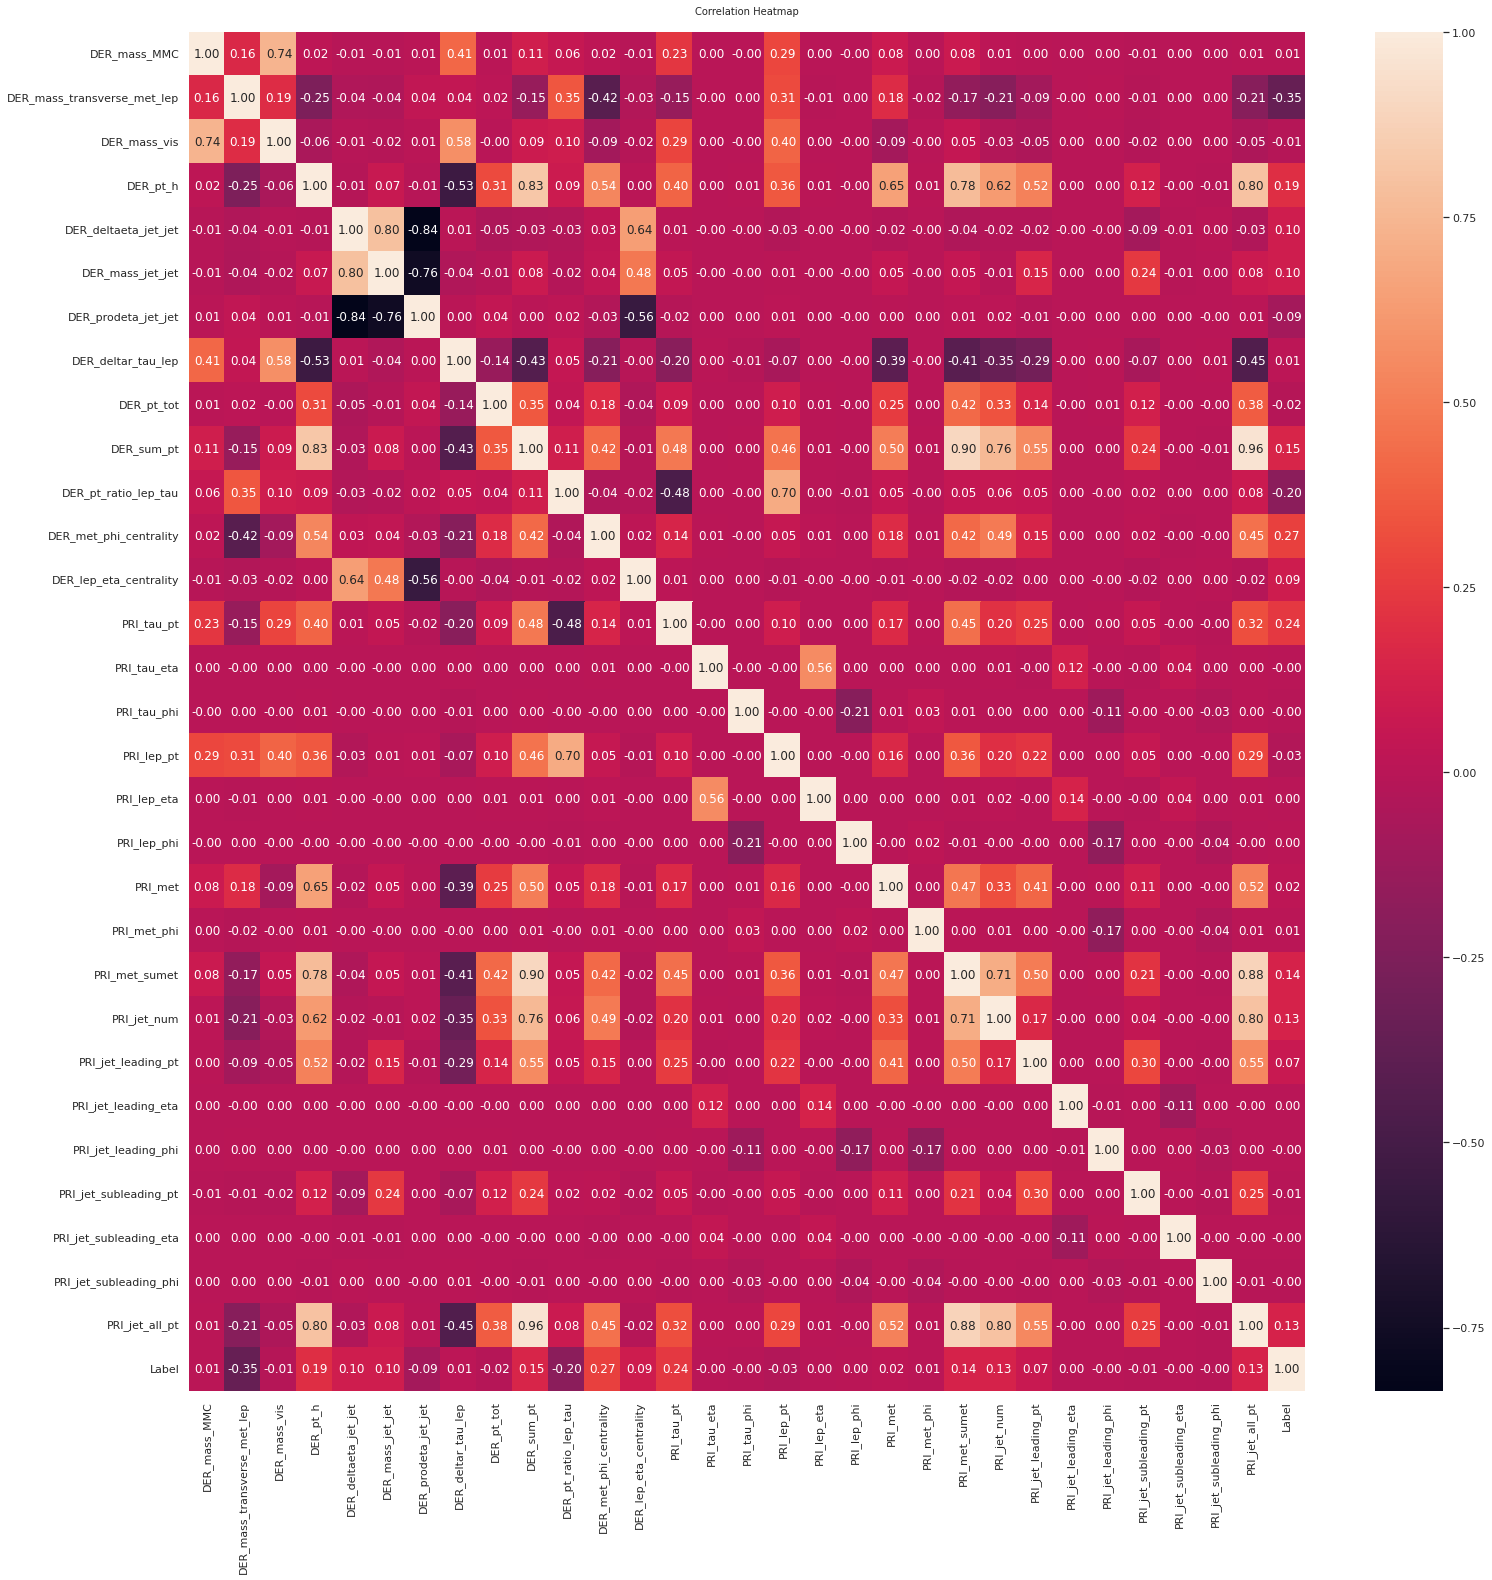

In [22]:
plt.figure(figsize= (25,25))
sns.heatmap(df_train_new.corr(), annot = True, fmt='.2f')
plt.title("Correlation Heatmap\n", fontsize=10)
plt.show()

* #### <b> Barplot and donutplot of our dataframe columns 

In [23]:
def bar_donut(df, col, h = 500, w = 800):
    fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'xy'}, {'type': 'domain'}]])
    x_val, y_val = df[col].value_counts(sort = False).index.tolist(), df[col].value_counts(sort = False).tolist()
    fig.add_trace(go.Bar(x = x_val, y = y_val, text = y_val, textposition = 'auto'), row = 1, col = 1)
    fig.add_trace(go.Pie(values = y_val, labels = x_val, hole = 0.5, textinfo = 'label+percent', title = f"{col}"), row = 1, col = 2)
    fig.update_layout(height = h, width = w, showlegend = True, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1), title = dict(text = f"Frequency distribution of {col}", x = 0.5, y = 0.95)) 
    fig.show()

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
bar_donut(df_train_new, 'Label')

<b> From the above subplots we can say that most of the labels are background noises instead of actual signals. 

* #### <b> Comparison of Feature distribution for the training dataset and the test dataset.

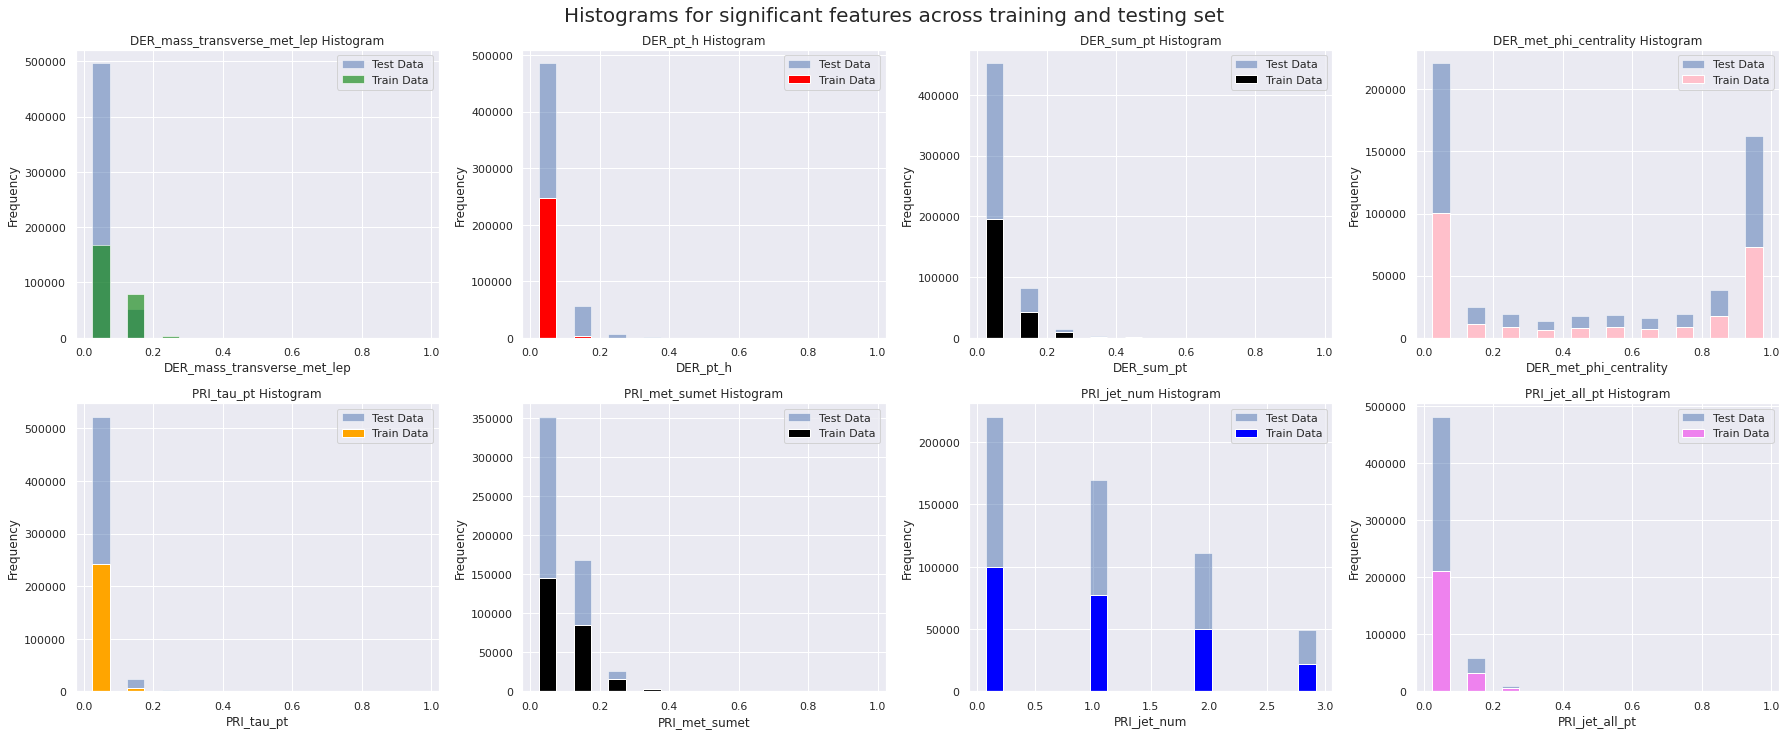

In [25]:
columns= ['DER_mass_transverse_met_lep', 'DER_pt_h' , 'DER_sum_pt' , 'DER_met_phi_centrality' , 'PRI_tau_pt' , 'PRI_met_sumet' , 'PRI_jet_num','PRI_jet_all_pt']

fig , ax = plt.subplots(2,4, figsize = (25,10))
fig.suptitle('Histograms for significant features across training and testing set', fontsize=20, y = 1.02)
ax[0][0].hist(df_test['DER_mass_transverse_met_lep'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[0][0].hist(df_train_new['DER_mass_transverse_met_lep'], label = 'Train Data', alpha = 0.6,rwidth= 0.5, color = 'Green')
ax[0][0].set_xlabel('DER_mass_transverse_met_lep'); ax[0][0].set_ylabel('Frequency')
ax[0][0].set_title("DER_mass_transverse_met_lep Histogram")
ax[0][0].legend()


ax[0][1].hist(df_test['DER_pt_h'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[0][1].hist(df_train_new['DER_pt_h'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'RED')
ax[0][1].set_xlabel('DER_pt_h'); ax[0][1].set_ylabel('Frequency')
ax[0][1].set_title("DER_pt_h Histogram")
ax[0][1].legend()


ax[0][2].hist(df_test['DER_sum_pt'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[0][2].hist(df_train_new['DER_sum_pt'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'Black')
ax[0][2].set_xlabel('DER_sum_pt'); ax[0][2].set_ylabel('Frequency')
ax[0][2].set_title("DER_sum_pt Histogram")
ax[0][2].legend()


ax[0][3].hist(df_test['DER_met_phi_centrality'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[0][3].hist(df_train_new['DER_met_phi_centrality'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'Pink')
ax[0][3].set_xlabel('DER_met_phi_centrality'); ax[0][3].set_ylabel('Frequency')
ax[0][3].set_title("DER_met_phi_centrality Histogram")
ax[0][3].legend()


ax[1][0].hist(df_test['PRI_tau_pt'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[1][0].hist(df_train_new['PRI_tau_pt'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'Orange')
ax[1][0].set_xlabel('PRI_tau_pt'); ax[1][0].set_ylabel('Frequency')
ax[1][0].set_title("PRI_tau_pt Histogram")
ax[1][0].legend()

ax[1][1].hist(df_test['PRI_met_sumet'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[1][1].hist(df_train_new['PRI_met_sumet'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'Black')
ax[1][1].set_xlabel('PRI_met_sumet'); ax[1][1].set_ylabel('Frequency')
ax[1][1].set_title("PRI_met_sumet Histogram")
ax[1][1].legend()

ax[1][2].hist(df_test['PRI_jet_num'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[1][2].hist(df_train_new['PRI_jet_num'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'Blue')
ax[1][2].set_xlabel('PRI_jet_num'); ax[1][2].set_ylabel('Frequency')
ax[1][2].set_title("PRI_jet_num Histogram")
ax[1][2].legend()

ax[1][3].hist(df_test['PRI_jet_all_pt'], label = 'Test Data', alpha = 0.5,rwidth= 0.5)
ax[1][3].hist(df_train_new['PRI_jet_all_pt'], label = 'Train Data', alpha = 1,rwidth= 0.5,color = 'Violet')
ax[1][3].set_xlabel('PRI_jet_all_pt'); ax[1][3].set_ylabel('Frequency')
ax[1][3].set_title("PRI_jet_all_pt Histogram")
ax[1][3].legend()


fig.tight_layout()
fig.show()

<b> we observe that the distributions corresponding to the two sets have almost similar structure.

* #### <b> Comparison of feature distributions by target class  "b"  or  "s" in the training set

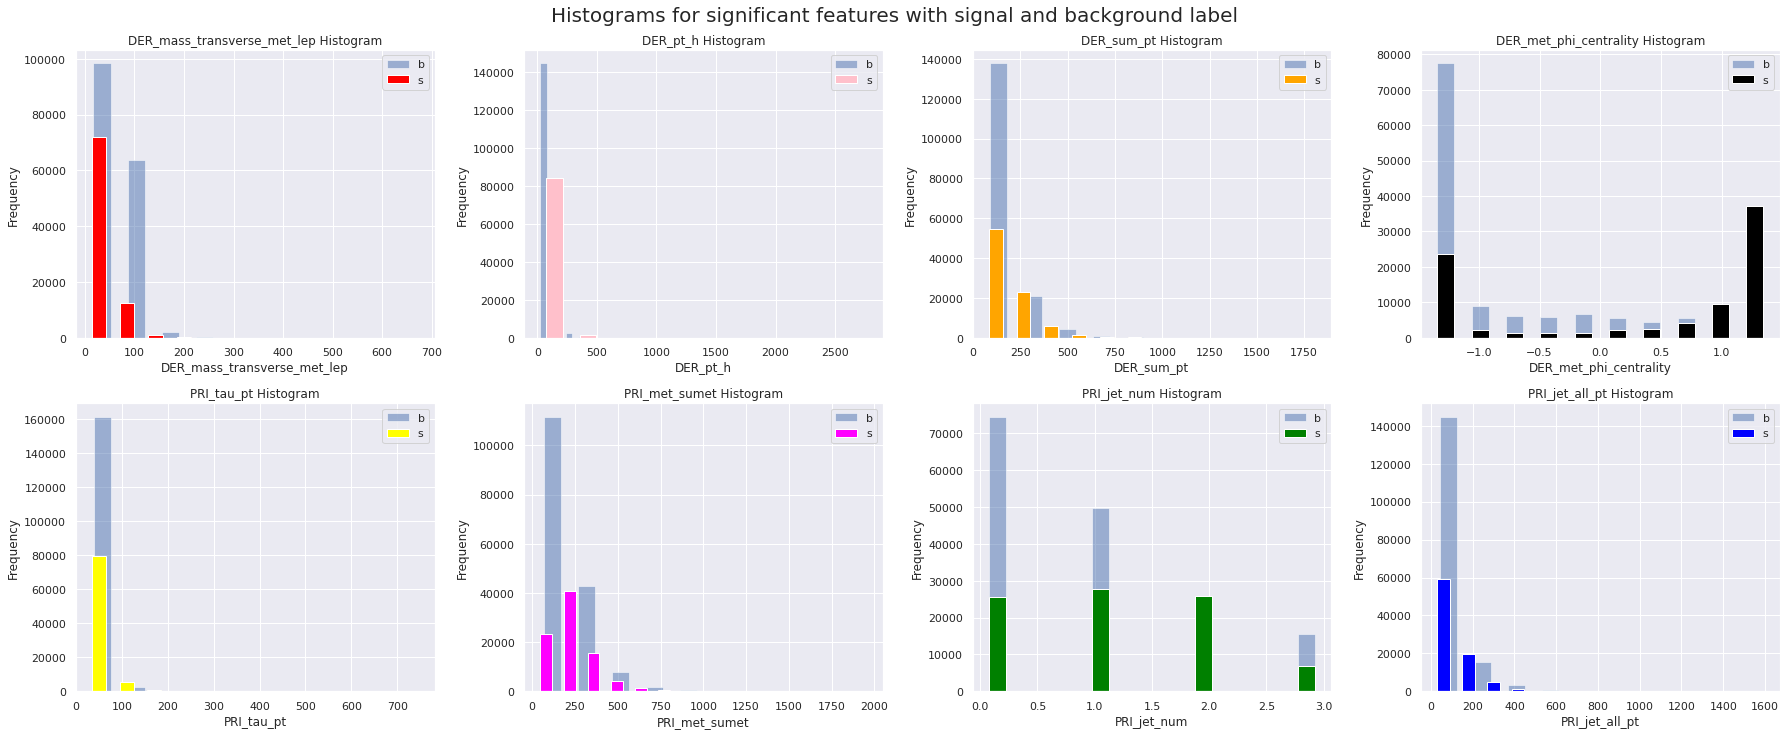

In [26]:
columns= ['DER_mass_transverse_met_lep', 'DER_pt_h' , 'DER_sum_pt' , 'DER_met_phi_centrality' , 'PRI_tau_pt' , 'PRI_met_sumet' , 'PRI_jet_num','PRI_jet_all_pt']
df_train_new_1 = pd.read_csv("training.csv") # Directly visualizing the original dataset
fig , ax = plt.subplots(2,4, figsize = (25,10))
fig.suptitle('Histograms for significant features with signal and background label', fontsize=20, y = 1.02)

ax[0][0].hist(df_train_new_1['DER_mass_transverse_met_lep'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[0][0].hist(df_train_new_1['DER_mass_transverse_met_lep'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5, color = 'RED')
ax[0][0].set_xlabel('DER_mass_transverse_met_lep'); ax[0][0].set_ylabel('Frequency')
ax[0][0].set_title("DER_mass_transverse_met_lep Histogram")
ax[0][0].legend()

ax[0][1].hist(df_train_new_1['DER_pt_h'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5, rwidth= 0.5)
ax[0][1].hist(df_train_new_1['DER_pt_h'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1, rwidth= 0.5,color = 'Pink')
ax[0][1].set_xlabel('DER_pt_h'); ax[0][1].set_ylabel('Frequency')
ax[0][1].set_title("DER_pt_h Histogram")
ax[0][1].legend()


ax[0][2].hist(df_train_new_1['DER_sum_pt'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[0][2].hist(df_train_new_1['DER_sum_pt'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'Orange')
ax[0][2].set_xlabel('DER_sum_pt'); ax[0][2].set_ylabel('Frequency')
ax[0][2].set_title("DER_sum_pt Histogram")
ax[0][2].legend()


ax[0][3].hist(df_train_new_1['DER_met_phi_centrality'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[0][3].hist(df_train_new_1['DER_met_phi_centrality'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'Black')
ax[0][3].set_xlabel('DER_met_phi_centrality'); ax[0][3].set_ylabel('Frequency')
ax[0][3].set_title("DER_met_phi_centrality Histogram")
ax[0][3].legend()


ax[1][0].hist(df_train_new_1['PRI_tau_pt'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[1][0].hist(df_train_new_1['PRI_tau_pt'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'Yellow')
ax[1][0].set_xlabel('PRI_tau_pt'); ax[1][0].set_ylabel('Frequency')
ax[1][0].set_title("PRI_tau_pt Histogram")
ax[1][0].legend()

ax[1][1].hist(df_train_new_1['PRI_met_sumet'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[1][1].hist(df_train_new_1['PRI_met_sumet'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'Magenta')
ax[1][1].set_xlabel('PRI_met_sumet'); ax[1][1].set_ylabel('Frequency')
ax[1][1].set_title("PRI_met_sumet Histogram")
ax[1][1].legend()

ax[1][2].hist(df_train_new_1['PRI_jet_num'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[1][2].hist(df_train_new_1['PRI_jet_num'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'Green')
ax[1][2].set_xlabel('PRI_jet_num'); ax[1][2].set_ylabel('Frequency')
ax[1][2].set_title("PRI_jet_num Histogram")
ax[1][2].legend()

ax[1][3].hist(df_train_new_1['PRI_jet_all_pt'][df_train_new_1["Label"] == 'b'], label = 'b', alpha = 0.5,rwidth= 0.5)
ax[1][3].hist(df_train_new_1['PRI_jet_all_pt'][df_train_new_1["Label"] == 's'], label = 's', alpha = 1,rwidth= 0.5,color = 'Blue')
ax[1][3].set_xlabel('PRI_jet_all_pt'); ax[1][3].set_ylabel('Frequency')
ax[1][3].set_title("PRI_jet_all_pt Histogram")
ax[1][3].legend()

fig.tight_layout()
fig.show()

* #### <b>  Correlation heatmap of float features for background events and signal events in the training set

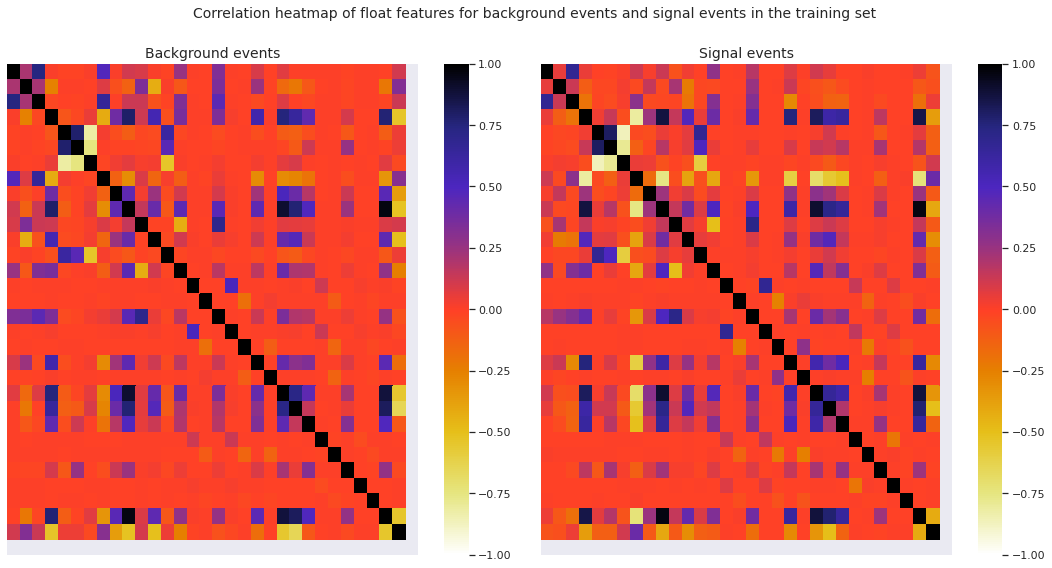

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7.5), sharex = True, sharey = True)
sns.heatmap(df_train[df_train["Label"] == 0].corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[0])
sns.heatmap(df_train[df_train["Label"] == 1].corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
plt.suptitle("Correlation heatmap of float features for background events and signal events in the training set", fontsize = 14, y = 1.05)
plt.tight_layout()
plt.show()

<b>The two heatmaps are more or less similar, i.e. the overall correlation structure of the features corresponding to the background events and the signal events in the training set are very much same.

# <b> Preparing the Predictors and Response Variable For different ML Algorithms:

In [28]:
x = df_train.drop(["Label","Weight"],axis =1)
y = df_train["Label"]

Splitting the data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.75, random_state= 42) 

# <b> Logistic regression Model

In [70]:
log_re= LogisticRegression (max_iter= 1000)
log_re.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [71]:
y_pred_logre = log_re.predict(x_test)

In [72]:
acc_logre = accuracy_score(y_pred_logre, y_test)
print("The Accuracy Score  of the Logistic regression Model is :", acc_logre.round(decimals = 2)*100,"%")

The Accuracy Score  of the Logistic regression Model is : 74.0 %


In [73]:
 f1_logre = f1_score(y_pred_logre, y_test)
print(f"The  f1 score of the model is: {f1_logre.round(decimals = 2)*100}%")

The  f1 score of the model is: 57.99999999999999%


Changing Max_iter is not changing the result.

# <b> Decision Tree Model 


<b> Trying to get the best possible degree for the model

In [74]:
degree = np.arange(1,51)
f1_list = []
acc_list= []

from sklearn.tree import DecisionTreeClassifier

for i in degree: 
    dct = DecisionTreeClassifier(max_depth = i)
    dct.fit(x_train,y_train)

  
    y_pred_dct = dct.predict(x_test)

    
    acc_dct = round(accuracy_score(y_pred_dct, y_test),4)
    acc_list.append(acc_dct)

 
    F1_score_dct = f1_score(y_test,y_pred_dct)
    f1_list.append(F1_score_dct)



In [75]:
best_depth_f1 = degree[np.argmax(f1_list)]
print (f"The best degree corrosponds to the best f1 score: {best_depth_f1}")

The best degree corrosponds to the best f1 score: 10


In [76]:
dct = DecisionTreeClassifier(max_depth = 10)
dct.fit(x_train, y_train)
 
y_pred_dct = dct.predict(x_test)

In [77]:
 acc_dct = accuracy_score(y_pred_dct, y_test)
print("The Accuracy Score  of the Decision Tree Model is :", acc_dct.round(decimals = 2)*100,"%")

The Accuracy Score  of the Decision Tree Model is : 82.0 %


In [78]:
f1_dct = f1_score(y_pred_dct, y_test)
print(f"The  f1 score of the model is: {f1_dct.round(decimals = 2)*100}%")

The  f1 score of the model is: 72.0%


In [79]:
report_dct = classification_report(y_test,y_pred_dct, target_names = ['b','s'])
print(report_dct)

              precision    recall  f1-score   support

           b       0.85      0.88      0.87     41307
           s       0.75      0.70      0.72     21193

    accuracy                           0.82     62500
   macro avg       0.80      0.79      0.79     62500
weighted avg       0.82      0.82      0.82     62500



This model is working better than the Logistic Regression model

# <b>  Random Forest Model

In [84]:
forest = RandomForestClassifier(n_estimators =100, max_depth = 11 , class_weight = 'balanced_subsample', random_state =42)

forest.fit(x_train,y_train) 
y_pred_forest = forest.predict(x_test)

In [100]:
acc_forest = accuracy_score(y_pred_forest, y_test)
print("The Accuracy Score  of the Model is :", acc_forest.round(decimals = 2)*100,"%")

The Accuracy Score  of the Model is : 83.0 %


In [86]:
f1_forest = f1_score(y_pred_forest, y_test)
print(f"The  f1 score of the model is: {f1_forest.round(decimals = 2)*100}%")

The  f1 score of the model is: 74.0%


In [87]:
report_forest = classification_report(y_test,y_pred_forest, target_names = ['b','s'])
print(report_forest)

              precision    recall  f1-score   support

           b       0.89      0.81      0.85     41307
           s       0.69      0.81      0.74     21193

    accuracy                           0.81     62500
   macro avg       0.79      0.81      0.80     62500
weighted avg       0.82      0.81      0.81     62500



One can run this for different n_estimators but the score remain the same. 

Checking the Importance feature

Feature ranking:


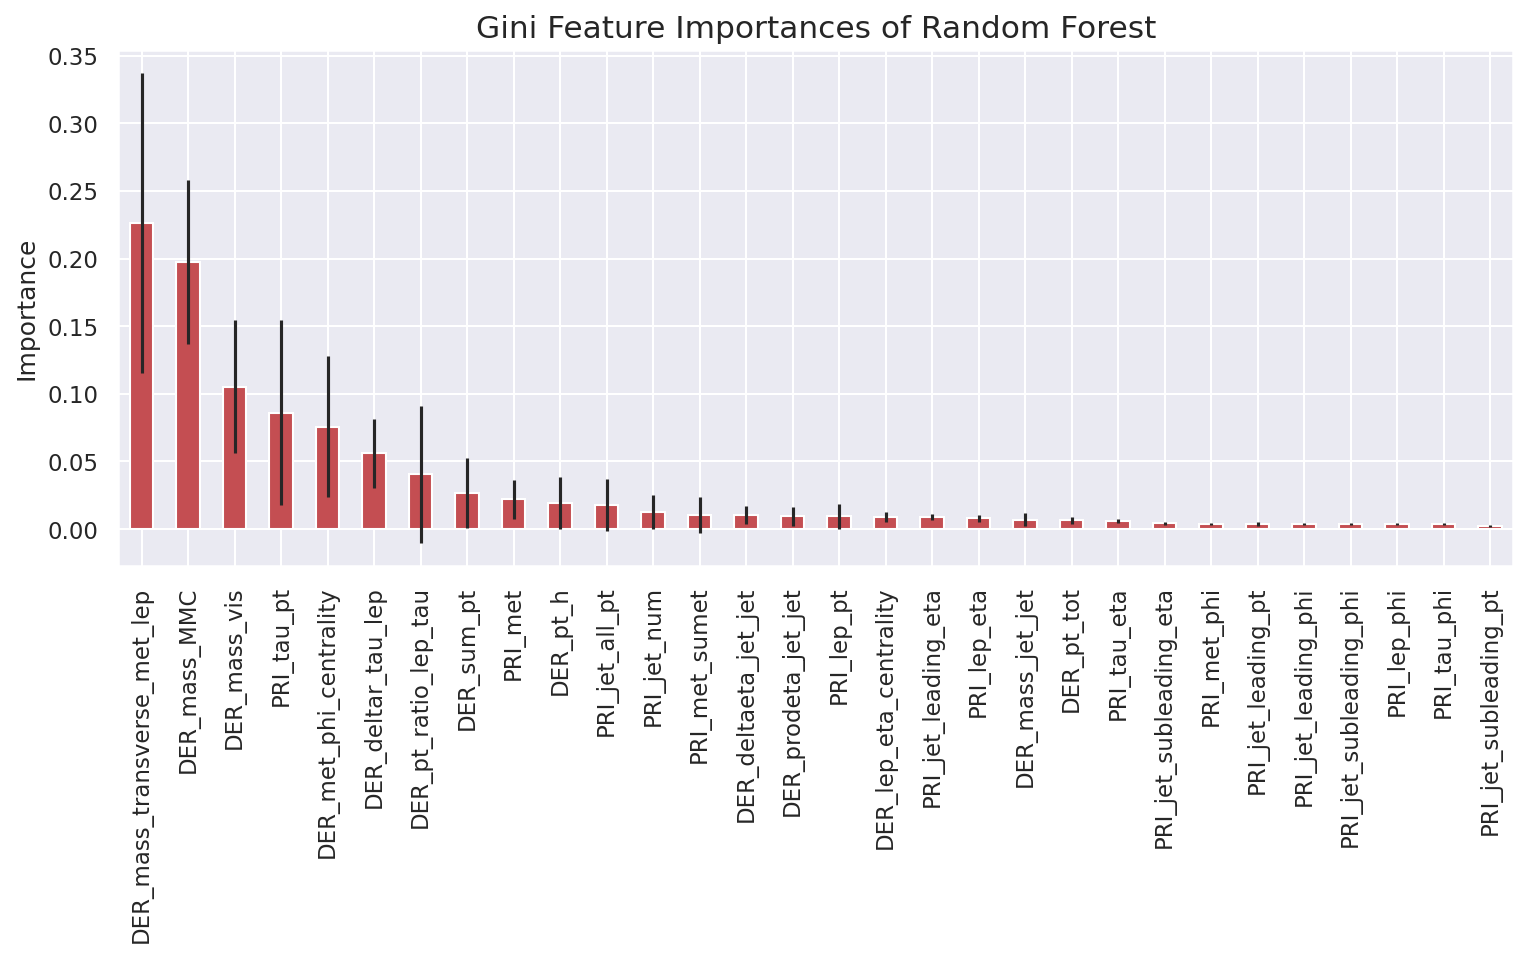

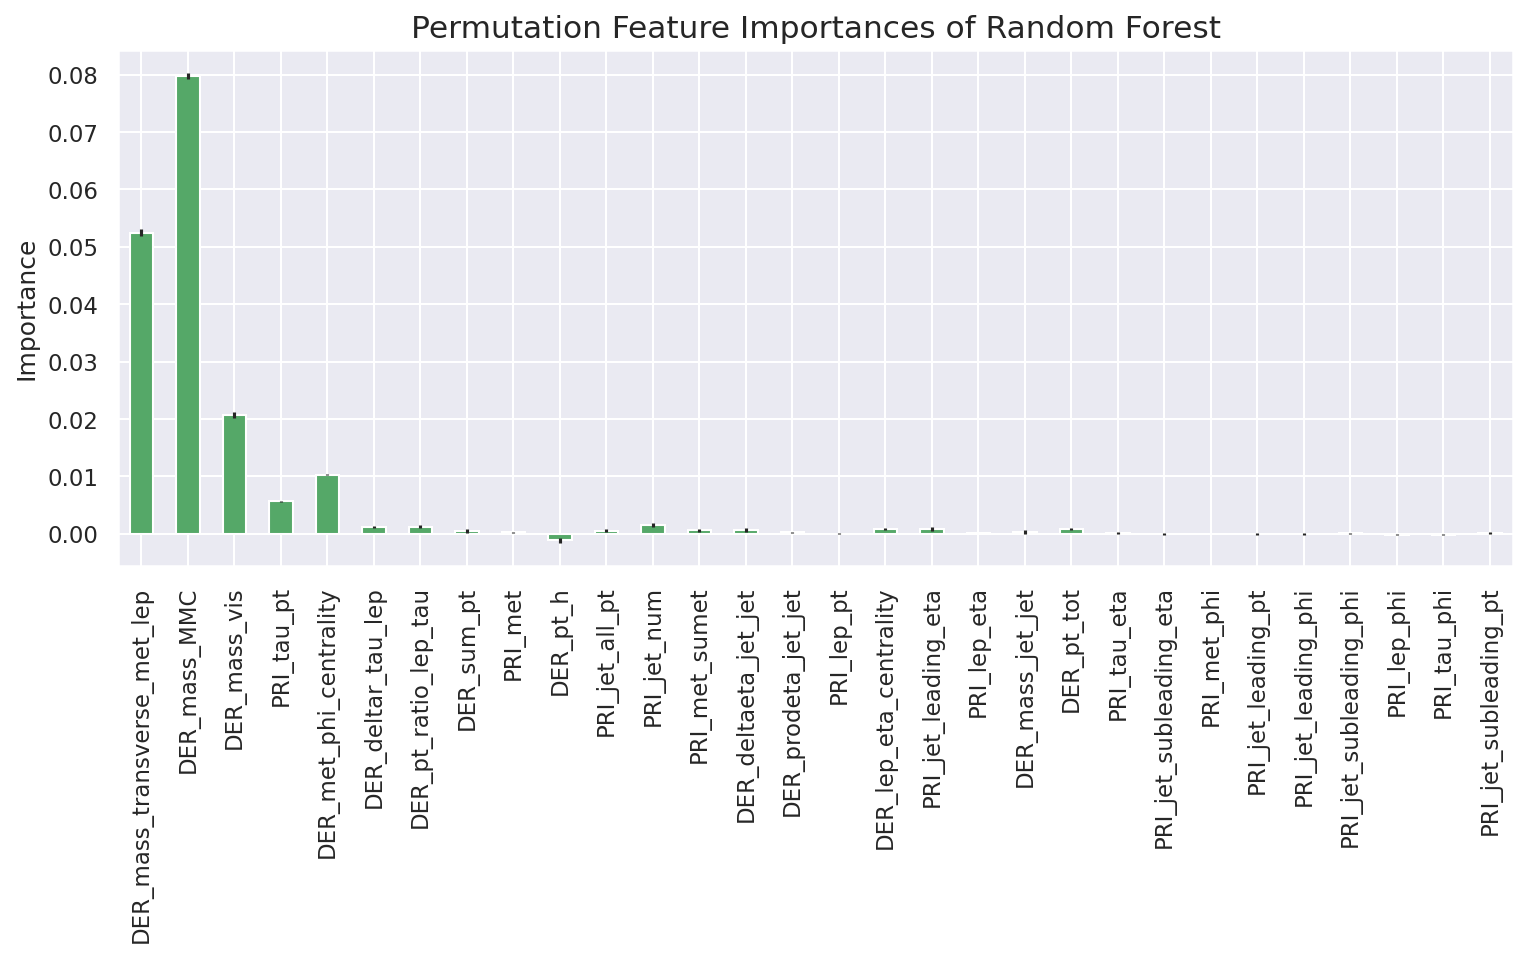

In [138]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)[indices]

permut_imp = permutation_importance(forest, x_test, y_test)

print("Feature ranking:")
importances = pd.Series(forest.feature_importances_, index=x_train.columns)[indices]
permut_importances = pd.Series(permut_imp.importances_mean, index=x_train.columns)[indices]


plt.figure(figsize=(12,8), dpi = 150)
plt.title("Gini Feature Importances of Random Forest", fontsize=15)
plt.ylabel('Importance')

importances.plot.bar(yerr=std, color='r', label = 'Gini')
plt.gcf().subplots_adjust(bottom=0.45)

plt.show()

plt.figure(figsize=(12,8), dpi = 150)
plt.title("Permutation Feature Importances of Random Forest", fontsize=15)
plt.ylabel('Importance')

permut_importances.plot.bar(yerr=permut_imp.importances_std, color = 'g', label = 'Permutation')

plt.gcf().subplots_adjust(bottom=0.45)

plt.show()

# XGBoost Classifier

In [90]:
from xgboost import XGBClassifier

In [104]:
XGB = XGBClassifier( random_state =42)

XGB.fit(x_train,y_train) 
y_pred_XGB = XGB.predict(x_test)

In [105]:
acc_XGB = accuracy_score(y_pred_XGB, y_test)
print("The Accuracy Score  of the Model is :", acc_XGB.round(decimals = 2)*100,"%")

The Accuracy Score  of the Model is : 83.0 %


In [106]:
f1_XGB = f1_score(y_pred_XGB, y_test)
print(f"The  f1 score of the model is: {f1_XGB.round(decimals = 2)*100}%")

The  f1 score of the model is: 73.0%


In [96]:
report_XGB = classification_report(y_test,y_pred_XGB, target_names = ['b','s'])
print(report_XGB)

              precision    recall  f1-score   support

           b       0.85      0.89      0.87     41307
           s       0.77      0.70      0.73     21193

    accuracy                           0.83     62500
   macro avg       0.81      0.80      0.80     62500
weighted avg       0.82      0.83      0.82     62500



# Hyperparameter Tuning

In [128]:
def test_params(**params):
    XGB1 = XGBClassifier( random_state=42, **params).fit(x_train, y_train)
    y_pred_XGB1 = XGB1.predict(x_test)
    return accuracy_score(y_pred_XGB1, y_test), f1_score(y_pred_XGB1, y_test)

In [130]:
test_params(n_estimators=50)

(0.819952, 0.7163991027999699)

In [131]:
test_params(n_estimators=250)

(0.83264, 0.7429722822881856)

In [133]:
test_params(n_estimators=1000)

(0.836656, 0.7503728879868939)

In [132]:
test_params(max_depth=5)

(0.834384, 0.7455944159068006)

In [134]:
test_params(max_depth=10)

(0.836496, 0.7494421968861101)

In [136]:
test_params(max_depth=15)

(0.834336, 0.7453266430539157)

n_estimators=1000 and max_depth=10 seems to be the best fit.

# Training the Best Model


In [140]:
XC = XGBClassifier(n_estimators=1000, max_depth=10, random_state =42)

XC.fit(x_train,y_train) 
y_pred_XC = XC.predict(x_test)

In [145]:
acc_XC = accuracy_score(y_pred_XC, y_test)
print("The Accuracy Score  of the Model is :", acc_XC.round(decimals = 2)*100,"%")

The Accuracy Score  of the Model is : 83.0 %


In [146]:
f1_XC = f1_score(y_pred_XC, y_test)
print(f"The  f1 score of the model is: {f1_XC.round(decimals = 2)*100}%")

The  f1 score of the model is: 75.0%


In [147]:
report_XC = classification_report(y_test,y_pred_XC, target_names = ['b','s'])
print(report_XC)

              precision    recall  f1-score   support

           b       0.86      0.89      0.88     41307
           s       0.78      0.72      0.75     21193

    accuracy                           0.83     62500
   macro avg       0.82      0.81      0.81     62500
weighted avg       0.83      0.83      0.83     62500



Let's analyse the importance feature

In [148]:
model_importances = XC.feature_importances_
model_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model_importances
}).sort_values('importance', ascending=False)

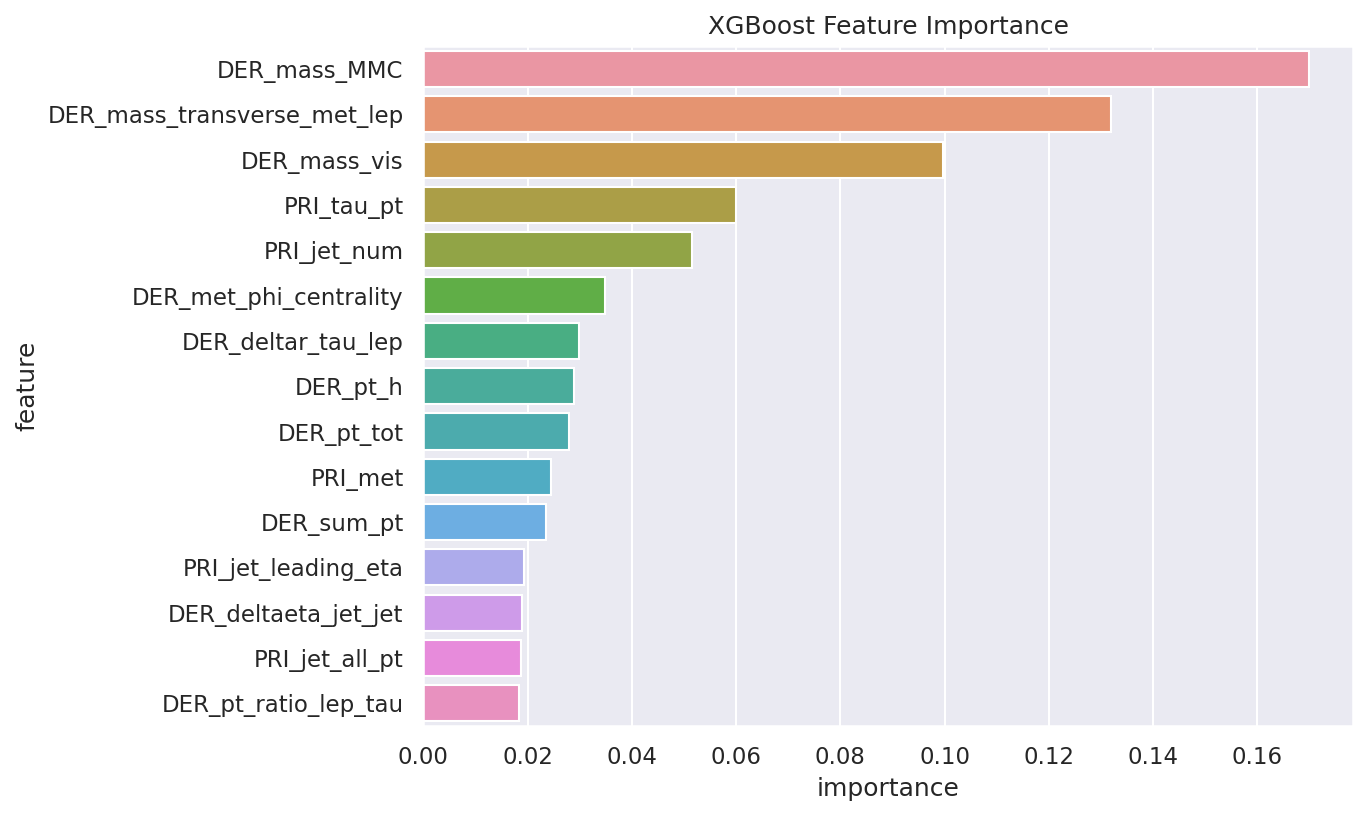

In [153]:
plt.figure(figsize=(8,6), dpi = 150)
plt.title('XGBoost Feature Importance')
sns.barplot(data=model_importance_df.head(15), x='importance', y='feature');

# <b> Plotting ROC Curve and Calculating roc_auc_score 

In [155]:
y_proba_logre = log_re.predict_proba(x_test)[:,1] 
y_proba_dct = dct.predict_proba(x_test)[:,1] 
y_proba_forest = forest.predict_proba(x_test)[:,1]
y_proba_XC = XC.predict_proba(x_test)[:,1]


auc_logre = roc_auc_score(y_test, y_proba_logre)
auc_dct = roc_auc_score(y_test, y_proba_dct)
auc_forest = roc_auc_score(y_test, y_proba_forest)
auc_XC = roc_auc_score(y_test, y_proba_XC)


In [161]:
print(f'''

The AUC_ score from the Logistic Regression Model : {auc_logre:.2f}
The AUC_ score from the Decision Tree Model : {auc_dct:.2f}
The AUC_ score from the Random Forest Model : {auc_forest:.2f}
The AUC_ score from the XGBoost Model : {auc_XC:.2f}


''')



The AUC_ score from the Logistic Regression Model : 0.80
The AUC_ score from the Decision Tree Model : 0.88
The AUC_ score from the Random Forest Model : 0.90
The AUC_ score from the XGBoost Model : 0.90





#### <b>Plotting ROC Curve

In [158]:
def plot_roc(y_test,y_prob_logre,y_prob_dct, y_prob_forest, y_prob_XC, ax):

    
    logre_fpr, logre_tpr, logre_thresholds = roc_curve(y_test, y_proba_logre)
    dct_fpr, dct_tpr, dct_thresholds = roc_curve(y_test, y_proba_dct)
    forest_fpr, forest_tpr, forest_thresholds = roc_curve(y_test, y_proba_forest)
    XC_fpr, XC_tpr, XC_thresholds = roc_curve(y_test, y_proba_XC)

    
    auc_logre = metrics.auc(logre_fpr,logre_tpr)
    auc_dct = metrics.auc(dct_fpr,dct_tpr)
    auc_forest = metrics.auc(forest_fpr,forest_tpr)
    XC_forest = metrics.auc(XC_fpr,XC_tpr)

    ax.plot(logre_fpr, logre_tpr, label=f'Logistic Regression (Area : {auc_logre:.4f}) ', color = 'Red')
    ax.plot(dct_fpr, dct_tpr, label=f'Decision Tree Classifier (Area : {auc_dct:.4f})', color = 'Blue')
    ax.plot(forest_fpr, forest_tpr, label=f'Random Forest Classifier (Area : {auc_forest:.4f})', color = 'Green')   
    ax.plot(XC_fpr, XC_tpr, label=f'XGBoost Classifier (Area : {auc_XC:.4f})', color = 'Black')  


    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    ax.legend(loc="lower right")


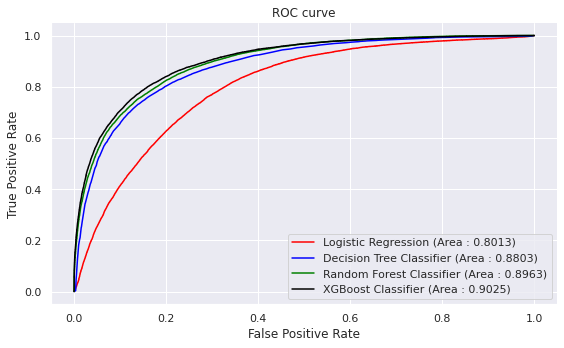

In [160]:

import sklearn.metrics as metrics

fig, ax = plt.subplots(figsize = (8,5))


plot_roc(y_test,y_proba_logre,y_proba_dct, y_proba_forest, y_proba_XC, ax)
[ax.spines[key].set_visible(False) for key in ax.spines.keys() if key not in ['bottom','left']];

plt.tight_layout()

# <b> CONCLUSION:

<b> Summarize everything we have gathered so far for all three models in Table format:

In [163]:
#Importing PrettyTable
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
table = PrettyTable(["Metric/Parameter","Logistic Regression","Decision Tree", "Random Forest","XGBoost"])

#Adding Rows

table.add_row(['Accuracy Score',round(acc_logre,2),round(acc_dct,2),round(acc_forest,2),round(acc_XC,2)])
table.add_row(['F1 Score',round(f1_logre,2),round(f1_dct,2),round(f1_forest,2),round(f1_XC,2)])
table.add_row(['Area Under Curve',round(auc_logre,2),round(auc_dct,2),round(auc_forest,2),round(auc_XC,2)])

print(table)

+------------------+---------------------+---------------+---------------+---------+
| Metric/Parameter | Logistic Regression | Decision Tree | Random Forest | XGBoost |
+------------------+---------------------+---------------+---------------+---------+
|  Accuracy Score  |         0.74        |      0.82     |      0.83     |   0.83  |
|     F1 Score     |         0.58        |      0.72     |      0.74     |   0.75  |
| Area Under Curve |         0.8         |      0.88     |      0.9      |   0.9   |
+------------------+---------------------+---------------+---------------+---------+


#### <b> From observing the table, clearly we can see that 'XGBoost Classifier' is performing the best.

# OUR TEST DATASET

In [165]:
df_test.fillna(method = 'ffill', inplace = True)

In [166]:
x_final_test = df_test

y_final_prediction = XC.predict(x_final_test)

In [167]:
 df_cols = ['EventId','RankOrder', 'Label']

df_submission = pd.DataFrame(columns = df_cols)
df_submission.EventId = np.arange(350000, 900000)
df_submission.Label = y_final_prediction
df_submission.RankOrder = np.arange(1,550001)

#### The dataset to submit for the Kaggle Higgs- Boson Challenge

In [168]:
df_submission.head()

,EventId,RankOrder,Label
0,350000,1,0.0
1,350001,2,0.0
2,350002,3,0.0
3,350003,4,1.0
4,350004,5,0.0


<b> We need to change Lables as 0 = b and 1 = s

In [169]:
df_submission['Label'][df_submission.Label == 0.0] ='b'
df_submission['Label'][df_submission.Label == 1.0] ='s'

<ipython-input-169-cc7431b960f5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-169-cc7431b960f5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Final dataset

In [170]:
print("Final Submission Dataset")
df_submission.head(20)


Final Submission Dataset


,EventId,RankOrder,Label
0,350000,1,b
1,350001,2,b
2,350002,3,b
3,350003,4,s
4,350004,5,b
5,350005,6,b
6,350006,7,b
7,350007,8,b
8,350008,9,b
9,350009,10,b


In [171]:
Counter(df_submission['Label'])

Counter({'b': 439765, 's': 110235})

Saving the dataframe to the local disk

In [172]:
df_submission.to_csv('submission.csv', index=False)

Finally, we can submit this dataframe to the kaggle website.

# <b> Summary

* For accuracy score both Random Forest and XGoost is performing the best. 
* From the Table, we are concluding that XGBoost is giving us the best result.
* This ROC Curve is giving us a clear that the XGBoost Classifier with the highest F1_score and AUC_score is the best performing model.
